## Diabetes logistic regression (82%)


Goals:
- Plot characteristics and reveal significant features
- Predict diabetes from health parameters

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

Pima Indians Diabetes Dataset

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### EDA
Glucose, BloodPressure, SkinThickness, Insulin and BMI have 0.0 as min value. But it is physically not possible for Insulin and BMI values to be zero

In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

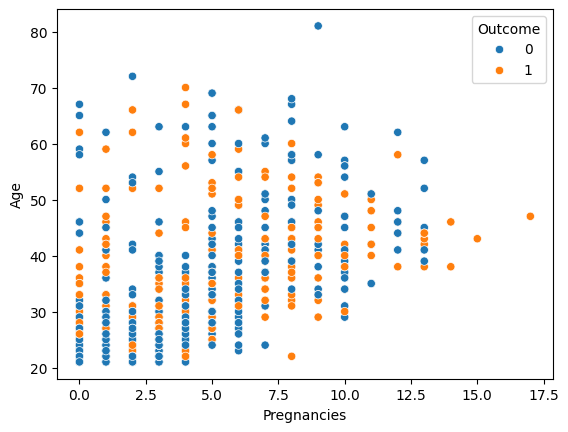

In [6]:
sns.scatterplot(x = 'Pregnancies', y = 'Age', data=df, hue='Outcome')
plt.show()

The plot doesn't seem to have an observable pattern

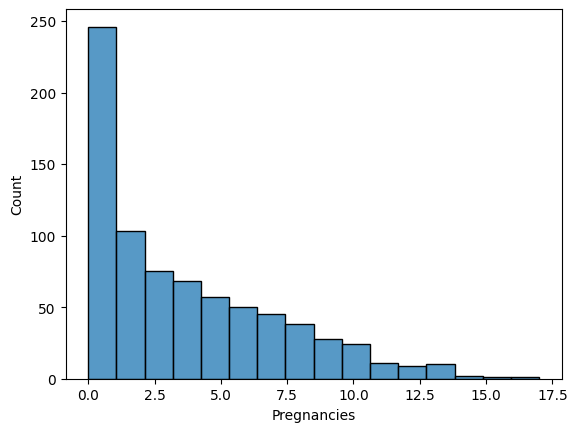

In [7]:
sns.histplot(x = 'Pregnancies', data=df)
plt.show()

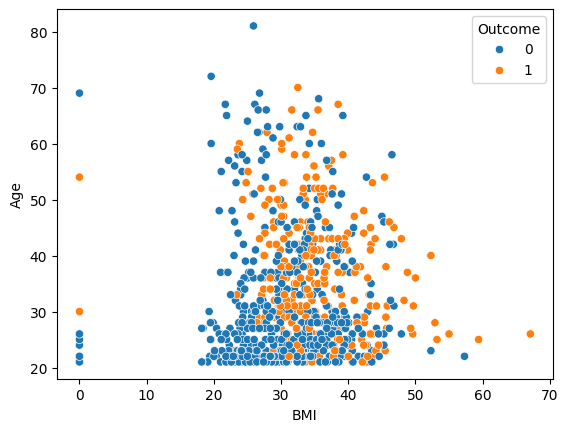

In [8]:
sns.scatterplot(x = 'BMI', y = 'Age', data=df, hue='Outcome')
plt.show()


Anomalous 0 BMI datapoints

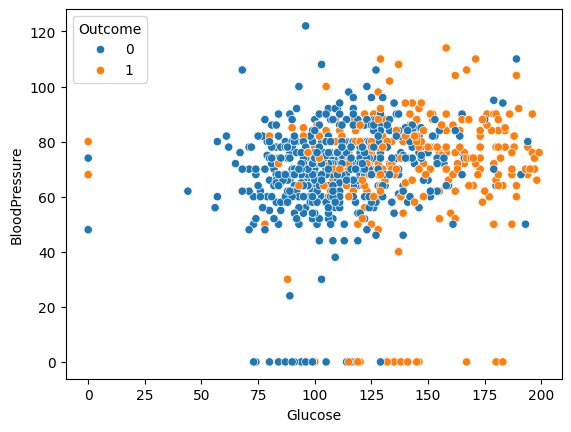

In [9]:
sns.scatterplot(x = 'Glucose', y = 'BloodPressure', data=df, hue='Outcome')
plt.show()

Spread out outcomes but >160 Glucose and >60 BP values seem to be strongly true for diabetics <br>
Age and BMI also have a correlation 

In [10]:
print(len(df[df['Outcome']==0]))
print(len(df[df['Outcome']==1]))

500
268


Imbalanced dataset. More diabetic entries than non-diabetic ones

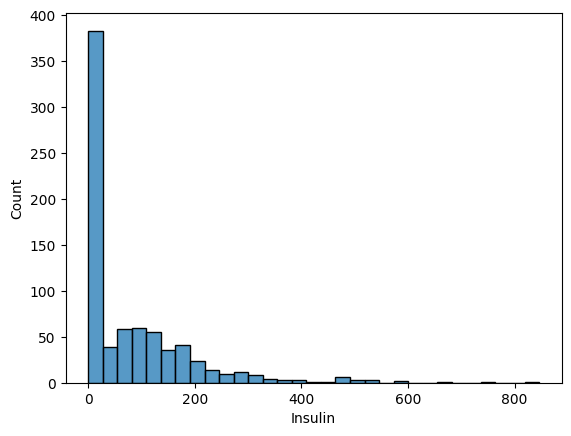

In [11]:
sns.histplot(x = 'Insulin', data=df)
plt.show()

### Data Preprocessing
Balancing the dataset:-
Checking for entries with 0 insulin levels yet no diagnosis of diabetes

In [12]:
df2 = df[(df['Insulin'] == 0) & (df['Outcome'] == 0)]
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
12,10,139,80,0,0,27.1,1.441,57,0
...,...,...,...,...,...,...,...,...,...
756,7,137,90,41,0,32.0,0.391,39,0
758,1,106,76,0,0,37.5,0.197,26,0
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0


Removing 0 insulin non-diabetic rows


In [13]:
df = df[~df.index.isin(df2.index)]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
763,10,101,76,48,180,32.9,0.171,63,0
765,5,121,72,23,112,26.2,0.245,30,0


Removing all anomalous rows with 0 in the Glucose, BloodPressure and SkinThickness columns

In [14]:
df = df[df['SkinThickness'] != 0]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
763,10,101,76,48,180,32.9,0.171,63,0


In [15]:
df = df[df['Glucose'] != 0]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
763,10,101,76,48,180,32.9,0.171,63,0


In [16]:
df = df[df['BloodPressure'] != 0]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
763,10,101,76,48,180,32.9,0.171,63,0


In [17]:
df[df['BMI'] == 0.0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
371,0,118,64,23,89,0.0,1.731,21,0


Inserting mean value in a 0 value BMI row (not dropping it since BMI is a significant feature)

In [18]:
mean_bmi = df.loc[df['BMI'] != 0, 'BMI'].mean()
mean_bmi

np.float64(33.39134396355353)

In [19]:
df.loc[371, 'BMI'] = mean_bmi
df[df['BMI'] == 0]



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


### Training the classification model

In [20]:
X = df.drop(['Outcome', 'Pregnancies'], axis=1)
y = df['Outcome']

In [21]:
X

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
6,78,50,32,88,31.0,0.248,26
8,197,70,45,543,30.5,0.158,53
...,...,...,...,...,...,...,...
755,128,88,39,110,36.5,1.057,37
760,88,58,26,16,28.4,0.766,22
761,170,74,31,0,44.0,0.403,43
763,101,76,48,180,32.9,0.171,63


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)


In [23]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

c:\Users\Lenovo\Desktop\ML_Practice\classml_venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [24]:
classifier.coef_

array([[ 0.0395058 , -0.00542047,  0.01965757, -0.00366832,  0.06654919,
         0.7736421 ,  0.0712437 ]])

In [25]:
classifier.intercept_

array([-9.93138689])

###  Model Evaluation

In [26]:
y_pred = classifier.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_pred, y_test))
print("Model Accuracy:")
print(100 * accuracy_score(y_pred, y_test))

Confusion Matrix:
[[46  7]
 [ 8 27]]
Model Accuracy:
82.95454545454545


In [27]:
print(classification_report(y_pred, y_test))


              precision    recall  f1-score   support

           0       0.85      0.87      0.86        53
           1       0.79      0.77      0.78        35

    accuracy                           0.83        88
   macro avg       0.82      0.82      0.82        88
weighted avg       0.83      0.83      0.83        88



In [28]:
print("ROC-AUC Score: ")
print(roc_auc_score(y_pred, y_test))

ROC-AUC Score: 
0.8196765498652291


### Conclusion
Accuracy Score:- 82.95% <br>
ROC-AUC:- 0.82



In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 23)
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)
scores = []
for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(accuracy_score(y_pred, y_test))


In [37]:
scores

[0.7348484848484849,
 0.7651515151515151,
 0.7878787878787878,
 0.7803030303030303,
 0.7727272727272727,
 0.8106060606060606,
 0.8181818181818182,
 0.803030303030303,
 0.8181818181818182,
 0.8333333333333334]

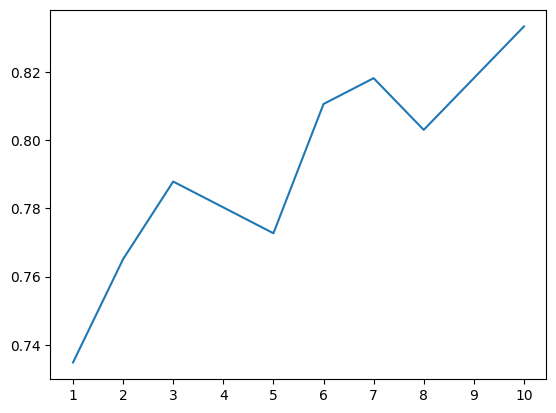

In [38]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.xticks(x)
plt.plot(x, scores)
plt.show()